<a href="https://colab.research.google.com/github/ahmadkaleem2/kaggle_Titanic/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model for predicting whether a person will survive or not

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import zipfile
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv')
test_prediction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv')

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Creating training data and labels and dropping irrelevent information

* Name is irrelevent to the probability of survival of a passenger but their gender is vital 
* PassengerId is also irrelevent to the survivability of any passenger
* Ticket is also irrelevent
* Cabin could be important but has too much missing data perhaps some passengers didn't have a cabin so we could change NaN to 0's

In [ ]:
survived = data['Survived']

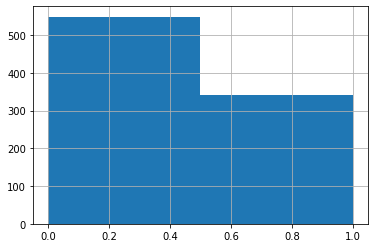

In [ ]:
survived.hist(bins=2,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


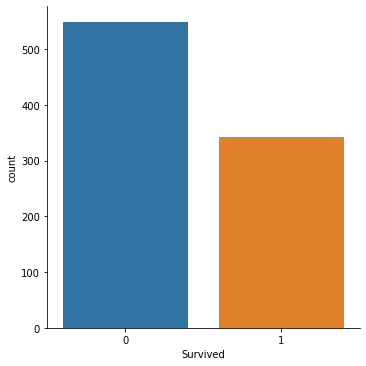

In [ ]:
sns.catplot('Survived',data=data,kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


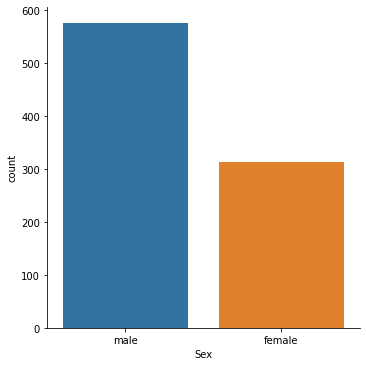

In [ ]:
sns.catplot('Sex',data=data,kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


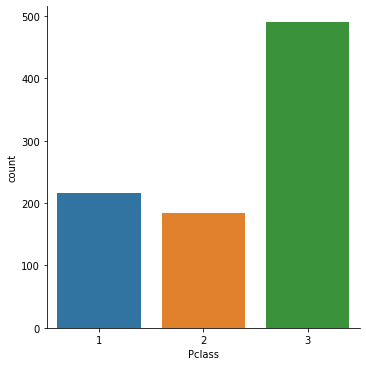

In [ ]:
sns.catplot('Pclass',data=data,kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


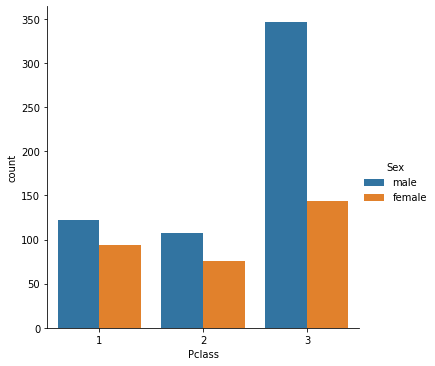

In [ ]:
sns.catplot('Pclass',data=data,hue='Sex',kind='count')

In [ ]:
train_labels = data['Survived']
train_data = data.drop(['Name','Cabin','Ticket','Survived','PassengerId'],axis=1)

# Some values of age are also NaN so changing them to the mean to prevent gradient explosion and gradient vanishing

In [ ]:
train_data[:25]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [ ]:
mean = tf.round(train_data[:]['Age'].mean())


In [ ]:
for index,row in train_data.iterrows():
  if math.isnan(train_data.iloc[index]['Age'])==True:
    train_data.at[index,'Age']=mean

In [ ]:
train_data[:25]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,30.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


# Our data should be one hot encoded for our neural network

In [ ]:
train_data = pd.get_dummies(train_data,columns=['Sex','Embarked'])

In [ ]:
train_data[:6]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,30.0,0,0,8.4583,0,1,0,1,0


In [ ]:
# Converting dataframe to numpy array
train_data = np.array(train_data.values)

# Normalizing data

In [ ]:
age_div = np.amax(train_data[:,1])
train_data[:,1]= train_data[:,1]/np.amax(train_data[:,1])

In [ ]:
train_data[:6]

array([[ 3.    ,  0.275 ,  1.    ,  0.    ,  7.25  ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ],
       [ 1.    ,  0.475 ,  1.    ,  0.    , 71.2833,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ],
       [ 3.    ,  0.325 ,  0.    ,  0.    ,  7.925 ,  1.    ,  0.    ,
         0.    ,  0.    ,  1.    ],
       [ 1.    ,  0.4375,  1.    ,  0.    , 53.1   ,  1.    ,  0.    ,
         0.    ,  0.    ,  1.    ],
       [ 3.    ,  0.4375,  0.    ,  0.    ,  8.05  ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ],
       [ 3.    ,  0.375 ,  0.    ,  0.    ,  8.4583,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ]])

In [ ]:
#train_data[:,1]= train_data[:,1]/np.amax(train_data[:,1])

In [ ]:
np.amax(train_data[:,1])

1.0

In [ ]:
fare_div = np.amax(train_data[:,4])
train_data[:,4] = train_data[:,4]/np.amax(train_data[:,4])

In [ ]:
train_data[:3]

array([[3.        , 0.275     , 1.        , 0.        , 0.01415106,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.475     , 1.        , 0.        , 0.13913574,
        1.        , 0.        , 1.        , 0.        , 0.        ],
       [3.        , 0.325     , 0.        , 0.        , 0.01546857,
        1.        , 0.        , 0.        , 0.        , 1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,train_labels,test_size=0.3,random_state = 36)


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(50,'relu'),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(25,'relu'), 
                               tf.keras.layers.Dense(1,'sigmoid')
])

In [ ]:
lr_sched = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

model_1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[lr_sched])

Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 0.6705 - accuracy: 0.6260 - val_loss: 0.6756 - val_accuracy: 0.5933
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6260 - val_loss: 0.6683 - val_accuracy: 0.5933
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6260 - val_loss: 0.6611 - val_accuracy: 0.5933
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6260 - val_loss: 0.6543 - val_accuracy: 0.5933
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6260 - val_loss: 0.6472 - val_accuracy: 0.5933
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.6260 - val_loss: 0.6397 - val_accuracy: 0.5933
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.6260 - val_loss: 0.6325 - val_accuracy: 0.5933
Epoch 8/50
20/20 [=

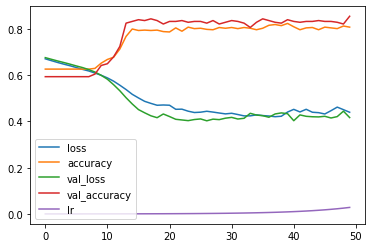

In [ ]:
pd.DataFrame(model_1.history.history).plot()

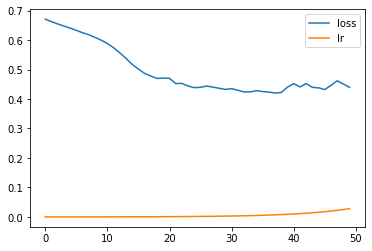

In [ ]:
pd.DataFrame(model_1.history.history).drop(['accuracy','val_loss','val_accuracy'],axis=1).plot()


(0.0, 2.0)

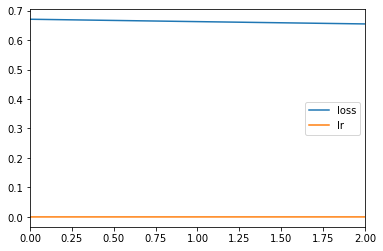

In [ ]:
pd.DataFrame(model_1.history.history).drop(['accuracy','val_loss','val_accuracy'],axis=1).plot()
plt.xlim((0,2))

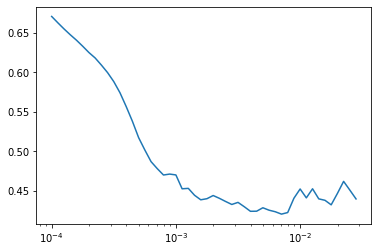

In [ ]:
plt.semilogx(model_1.history.history['lr'],model_1.history.history['loss'])

In [ ]:
tf.random.set_seed(38)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(15,'relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Dense(25,'relu'),
                              #tf.keras.layers.Dense(5,'relu'),
                              tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(1,'sigmoid')
                               
])

In [ ]:
def lr_scheduler(epoch,lr):
  if epoch>25:
    return lr*0.9
  return lr

lr_sched = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

model_1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[lr_sched])

Epoch 1/50
20/20 [==============================] - 1s 10ms/step - loss: 0.4150 - accuracy: 0.8299 - val_loss: 0.4162 - val_accuracy: 0.8545
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8315 - val_loss: 0.4158 - val_accuracy: 0.8507
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8315 - val_loss: 0.4155 - val_accuracy: 0.8507
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8315 - val_loss: 0.4152 - val_accuracy: 0.8507
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8315 - val_loss: 0.4148 - val_accuracy: 0.8507
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8315 - val_loss: 0.4145 - val_accuracy: 0.8507
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8315 - val_loss: 0.4142 - val_accuracy: 0.8507
Epoch 8/50
20/20 [=

In [ ]:

p_test_prediction = test_prediction['PassengerId']

In [ ]:
test_prediction = test_prediction.drop(['Name','Cabin','Ticket','PassengerId'],axis=1)

In [ ]:
test_prediction

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [ ]:
for index,row in test_prediction.iterrows():
  if math.isnan(test_prediction.iloc[index]['Age'])==True:
    test_prediction.at[index,'Age']=mean

In [ ]:
test_prediction

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,30.0,0,0,8.0500,S


In [ ]:
test_prediction[:153]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
148,1,male,30.0,0,0,26.5500,S
149,2,male,30.0,1,1,26.0000,S
150,1,female,23.0,0,1,83.1583,C
151,3,male,30.0,0,0,7.8958,C


In [ ]:
test_prediction = pd.get_dummies(test_prediction,columns=['Sex','Embarked'])

In [ ]:
test_prediction.at[152,'Fare']=26.

In [ ]:
test_prediction[:356]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50,0,0,7.8292,0,1,0,1,0
1,3,47.00,1,0,7.0000,1,0,0,0,1
2,2,62.00,0,0,9.6875,0,1,0,1,0
3,3,27.00,0,0,8.6625,0,1,0,0,1
4,3,22.00,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
351,2,25.00,0,0,10.5000,0,1,0,0,1
352,2,18.00,0,0,73.5000,0,1,0,0,1
353,2,49.00,1,2,65.0000,0,1,0,0,1
354,3,0.17,1,2,20.5750,1,0,0,0,1


In [ ]:
test_prediction = np.array(test_prediction.values)

In [ ]:
test_prediction[:356]

array([[ 3.  , 34.5 ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 3.  , 47.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 2.  , 62.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 2.  , 49.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  0.17,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 50.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [ ]:
test_prediction[:,1]= test_prediction[:,1]/age_div

In [ ]:
test_prediction[:50]

array([[3.00000e+00, 4.31250e-01, 0.00000e+00, 0.00000e+00, 7.82920e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00],
       [3.00000e+00, 5.87500e-01, 1.00000e+00, 0.00000e+00, 7.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
       [2.00000e+00, 7.75000e-01, 0.00000e+00, 0.00000e+00, 9.68750e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00],
       [3.00000e+00, 3.37500e-01, 0.00000e+00, 0.00000e+00, 8.66250e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
       [3.00000e+00, 2.75000e-01, 1.00000e+00, 1.00000e+00, 1.22875e+01,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
       [3.00000e+00, 1.75000e-01, 0.00000e+00, 0.00000e+00, 9.22500e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
       [3.00000e+00, 3.75000e-01, 0.00000e+00, 0.00000e+00, 7.62920e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00

In [ ]:
np.argmin(test_prediction[:,1])

354

In [ ]:
np.amin(test_prediction[:,1])

0.002125

In [ ]:
test_prediction[:,4] = test_prediction[:,4]/fare_div

In [ ]:
test_prediction[:50]

array([[3.        , 0.43125   , 0.        , 0.        , 0.01528158,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [3.        , 0.5875    , 1.        , 0.        , 0.01366309,
        1.        , 0.        , 0.        , 0.        , 1.        ],
       [2.        , 0.775     , 0.        , 0.        , 0.01890874,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [3.        , 0.3375    , 0.        , 0.        , 0.01690807,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [3.        , 0.275     , 1.        , 1.        , 0.0239836 ,
        1.        , 0.        , 0.        , 0.        , 1.        ],
       [3.        , 0.175     , 0.        , 0.        , 0.018006  ,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [3.        , 0.375     , 0.        , 0.        , 0.01489121,
        1.        , 0.        , 0.        , 1.        , 0.        ],
       [2.        , 0.325     , 1.       

In [ ]:
predictions = model_2.predict(test_prediction)

In [ ]:
predictions

array([[0.38433275],
       [0.41015953],
       [0.4062126 ],
       [0.39883405],
       [0.43865764],
       [0.41060305],
       [0.41547152],
       [0.4570483 ],
       [0.42201775],
       [0.36272234],
       [0.39605644],
       [0.45738968],
       [0.46699116],
       [0.38533142],
       [0.4469032 ],
       [0.41289812],
       [0.41117147],
       [0.38684773],
       [0.41664714],
       [0.41099006],
       [0.39069813],
       [0.44553122],
       [0.5066739 ],
       [0.44792837],
       [0.44905797],
       [0.37080875],
       [0.47670037],
       [0.3861403 ],
       [0.4608003 ],
       [0.33400017],
       [0.39413252],
       [0.36978972],
       [0.46624368],
       [0.4682461 ],
       [0.40224898],
       [0.3880279 ],
       [0.44212794],
       [0.44898194],
       [0.40070105],
       [0.40018862],
       [0.38947898],
       [0.46692324],
       [0.39106724],
       [0.46783108],
       [0.44790882],
       [0.40056762],
       [0.43576494],
       [0.386

In [ ]:
prediction = []

for i in predictions:
  if i>0.5:
    prediction.append(1)
  else:
    prediction.append(0)

In [ ]:
prediction.count(0)

409

In [ ]:
pred = {'PassengerId': p_test_prediction,'Survived': prediction}

In [ ]:
d = pd.DataFrame(pred)

In [ ]:
d.to_csv('preds2.csv',index=False,header=1)

In [ ]:
d

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


'/content/Titanic'